In [1]:
import numpy as np
import scipy
from scipy import sparse
import matplotlib.pyplot as plt

import sys
sys.path.append('./Exact_Diagonalization')  # Add subfolder to Python path

import exact_diagonalization as ed
import Class_site as site
import free_fermion_representation as f

import importlib
importlib.reload(ed)
importlib.reload(site)
importlib.reload(f)


<module 'free_fermion_representation' from '/Users/giovanniconcheri/Desktop/TESI/MasterThesis/free_fermion_representation.py'>

# ED

In [2]:
n_spins = 14
qubit1 = 0
qubit2 = 4

psi_fluxfree = ed.flux_freestate(n_spins, qubit1, qubit2)
psi_diagonal = ed.diagonal_state(n_spins, qubit1, qubit2)

(16384, 16384)
(16384, 16384)
i,j,z 0 1 0
i,j,z 1 0 0


In [3]:
X = sparse.csr_array([[0.,1.],[1.,0.]])
Y = sparse.csr_array([[0.,-1.j],[1.j,0.]])
Z = sparse.csr_array([[1.,0.],[0.,-1.]])
I = sparse.csr_array(np.eye(2))

# FGS

In [4]:
model = site.SitesProtBonds(Npx=2, Npy=1, index = 3)
fgs = f.FermionicGaussianRepresentation(model)
print(model.Nsites)

14


In [5]:
fgs.reset_cov_0_matrix()
np.linalg.eigvals(fgs.Cov_0)

array([0.00000000e+00+1.j, 2.77555756e-17-1.j, 0.00000000e+00+1.j,
       2.77555756e-17-1.j, 0.00000000e+00+1.j, 2.77555756e-17-1.j,
       0.00000000e+00+1.j, 2.77555756e-17-1.j, 0.00000000e+00+1.j,
       2.77555756e-17-1.j, 0.00000000e+00+1.j, 2.77555756e-17-1.j,
       0.00000000e+00+1.j, 2.77555756e-17-1.j])

In [6]:
Op_list = [X, Y, Z, X, Y, Z]
index_list = [3, 2, 1, 6, 7, 4]

W_tilde_1 = ed.Op_string(Op_list, index_list, I, n_spins)

# Compute the expectation value
expectation_value = psi_fluxfree.conj() @ W_tilde_1 @ psi_fluxfree

# Print the result
print("First plaquette term:", expectation_value)

First plaquette term: (0.9999999999999991-7.745036314193294e-20j)


In [7]:
Op_list = [X, Y, Z, X, Y, Z]
index_list = [7, 6, 9, 12, 13, 10]

W_tilde_2 = ed.Op_string(Op_list, index_list, I, n_spins)

# Compute the expectation value
expectation_value = psi_fluxfree.conj() @ W_tilde_2 @ psi_fluxfree

# Print the result
print("Second plaquette term:", expectation_value)

Second plaquette term: (0.9999999999999991-4.265443305812136e-18j)


In [8]:
Op_list = [Z, X, Z, X]
index_list = [1, 2, 7, 6]

e_loop = ed.Op_string(Op_list, index_list, I, n_spins)

# Compute the complex conjugate transpose of psi_diagonal
psi_diagonal_dagger = psi_diagonal.conj()

e_loop_Value = psi_diagonal_dagger @ e_loop @ psi_diagonal

print("e_loop Value:", e_loop_Value)


e_loop Value: (0.9999999999999999-6.143054205688061e-19j)


### e-m anyons

In [9]:
psi_e = ed.Op_full(Z, I, 3, n_spins)  @ psi_diagonal.copy()


#check fermion occupation number
e_loop_Value = psi_e.conj() @ e_loop @ psi_e
print("e_loop Value:", e_loop_Value) #should be +1 (fermionic parity)

# #check plaquette term:
# W1_value = psi_e.conj() @ W_tilde_1 @ psi_e
# print("First plaquette term:", W1_value) #should be -1

e_loop Value: (0.9999999999999999-6.143054205688061e-19j)


In [10]:
T = 0.9

_, list_zxzx = ed.floquet_evolution(psi_e, 10, n_spins, e_loop, T=T, X=X, Z=Z, Y=Y, I=I)

for i in list_zxzx:
    print(i)


/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:597: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
i,j,z 1 1 1
(0.9999999999999999-6.143054205688061e-19j)
(-0.9282730342871024-1.0842021724855044e-17j)
(0.7414332213052113-8.673617379884035e-19j)
(-0.5691613165936202+6.938893903907228e-18j)
(0.3720469091571189+5.7462715141731735e-18j)
(-0.15930458828191024+2.6020852139652106e-18j)
(0.0003780481398070216+5.551115123125783e-17j)
(0.1475239210722478+3.469446951953614e-18j)
(-0.2969897697846583-6.938893903907228e-18j)
(0.4339717186743772+1.734723475976807e-18j)
(-0.6293278714816644+5.204170427930421e-18j)


1j
(-0-0.9282730342871004j)
0.836409134039959j
(-0-0.7820183549663996j)
0.7402938580970211j
(-0-0.6813426999510046j)
0.5332223704956005j
(-0-0.4111449921765006j)
0.15264696406766776j
0.024543452618743238j
(-0-0.1974837471900026j)


Text(0.5, 1.0, 'Measurement of Loop operator O under Floquet drive')

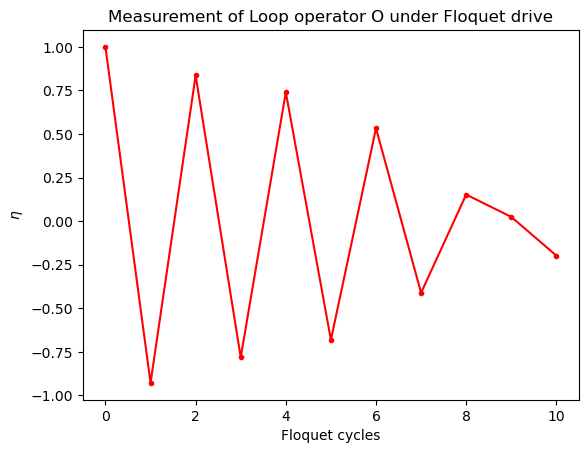

In [11]:
fgs.reset_cov_0_matrix()
fgs.reset_cov_e_matrix()

Rex, Rey, Rez, Re = f.floquet_operator(fgs.he_x, fgs.he_y, fgs.he_z, T)
R0x, R0y, R0z, R0 = f.floquet_operator(fgs.h0_x, fgs.h0_y, fgs.h0_z, T)

N = 10
exp_value = []
for i in range(N):
    n = fgs.expectation_val_Majorana_string(model, small_loop=True)[1]
    exp_value.append(n)
    print(n)
    fgs.update_cov_0_matrix(R0)
    fgs.update_cov_e_matrix(Re)


n = fgs.expectation_val_Majorana_string(model, small_loop=True)[1]
exp_value.append(n)
print(n)

plt.plot(range(N+1), np.imag(exp_value), '.-', color='red')
plt.xlabel('Floquet cycles')
plt.ylabel(r'$\eta$')
plt.title("Measurement of Loop operator O under Floquet drive")

In [27]:
psi_e = ed.floquet_unitary(psi_m, n_spins, applyX = True, applyY = True, applyZ = True)

#let us check if we actually have e anyon:

#check fermionic parity
ZXZX_Value = psi_e.conj() @ ZXZX @ psi_e
print("ZXZX Value:", ZXZX_Value) #should be -1

#check plaquette term:
W1_value = psi_e.conj() @ W_tilde_1 @ psi_e
print("First plaquette term:", W1_value) #should be -1

i,j,z 1 1 1
ZXZX Value: (-0.9999999999999993+7.703719777548943e-33j)
First plaquette term: (-0.9999999999999996+3.851859888774472e-34j)


/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/scipy/sparse/linalg/_dsolve/linsolve.py:597: SparseEfficiencyWarning: splu converted its input to CSC format
  return splu(A).solve
/Users/giovanniconcheri/miniconda3/envs/Computational/lib/python3.13/site-packages/scipy/sparse/linalg/_matfuncs.py:707: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  return spsolve(Q, P)


As a last check, let us measure  an electric loop around the plaquette. It should correspond to +1 for an e anyon, and to -1 for an m anyon. Therefore, driving the system with Floquet drive, it should oscillate between +-1

In [ ]:


# Compute the expectation value
expectation_value_e = psi_e.conj() @ e_loop @ psi_e
# Print the result
print("e anyon: e loop term:", expectation_value_e) #should be +1

# Compute the expectation value
expectation_value_m = psi_m.conj() @ e_loop @ psi_m
# Print the result
print("m anyon: e loop term:", expectation_value_m) #should be -1

#for now it does the opposite of what it should do :)


e anyon: e loop term: (0.9999999999999993-6.162975822039155e-33j)
m anyon: e loop term: (-0.9999999999999999+6.143054205688061e-19j)
